# Task_01
## Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.

## Required Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Loading the Data

In [41]:
population_data = pd.read_csv("population_data.csv")

In [42]:
population_data.head()

,Series Name,Series Code,Country Name,Country Code,2022,2021,2020,2019,2018,2017,...,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,41128771.0,40099462.0,38972230.0,37769499.0,36686784.0,35643418.0,...,28189672.0,27385307.0,26427199.0,25903301.0,25442944.0,24411191.0,23553551.0,22645130.0,21000256.0,19688632.0
1,"Population, total",SP.POP.TOTL,Albania,ALB,2775634.0,2811666.0,2837849.0,2854191.0,2866376.0,2873457.0,...,2913021.0,2927519.0,2947314.0,2970017.0,2992547.0,3011487.0,3026939.0,3039616.0,3051010.0,3060173.0
2,"Population, total",SP.POP.TOTL,Algeria,DZA,44903225.0,44177969.0,43451666.0,42705368.0,41927007.0,41136546.0,...,35856344.0,35196037.0,34569592.0,33983827.0,33435080.0,32956690.0,32510186.0,32055883.0,31624696.0,31200985.0
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,44273.0,45035.0,46189.0,47321.0,48424.0,49463.0,...,54849.0,55366.0,55891.0,56383.0,56837.0,57254.0,57626.0,57941.0,58177.0,58324.0
4,"Population, total",SP.POP.TOTL,Andorra,AND,79824.0,79034.0,77700.0,76343.0,75013.0,73837.0,...,71519.0,73852.0,76055.0,78168.0,80221.0,79826.0,76933.0,73907.0,70849.0,67820.0


In [43]:
population_data.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code', '2022',
       '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013',
       '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004',
       '2003', '2002', '2001'],
      dtype='object')

In [44]:
population_data.isnull().sum()

Series Name     0
Series Code     0
Country Name    0
Country Code    0
2022            0
2021            0
2020            0
2019            0
2018            0
2017            0
2016            0
2015            0
2014            0
2013            0
2012            0
2011            0
2010            0
2009            0
2008            0
2007            0
2006            0
2005            0
2004            0
2003            0
2002            0
2001            0
dtype: int64

## Preparing Data for Required Visualizations

In [53]:
total_population = population_data[population_data['Series Name'] == 'Population, total'].iloc[0]
female_population = population_data[population_data['Series Name'] == 'Population, female'].iloc[0]
male_population = population_data[population_data['Series Name'] == 'Population, male'].iloc[0]

In [54]:
years = [str(year) for year in range(2001, 2023)]
total_values = total_population[years].values.astype(int)
female_values = female_population[years].values.astype(int)
male_values = male_population[years].values.astype(int)

## Bar Chart: Population Distribution by Gender (2001-2022)

This bar chart represents the total, female, and male populations from 2001 to 2022. It provides a clear comparison of how the population has changed over time, broken down by gender.

* Total Population (Blue Bars): Represents the overall population count for each year.
* Female Population (Pink Bars): Shows the number of females in the population each year.
* Male Population (Green Bars): Represents the male population trends over the years.

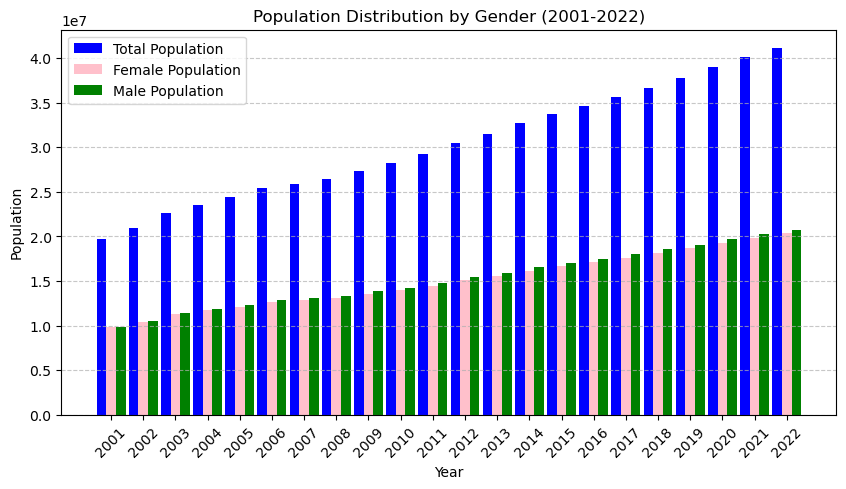

In [57]:
x = np.arange(len(years)) 

plt.figure(figsize=(10, 5))
bar_width = 0.3  # Width of bars

plt.bar(x - bar_width, total_values, width=bar_width, label='Total Population', color='blue')
plt.bar(x, female_values, width=bar_width, label='Female Population', color='pink')
plt.bar(x + bar_width, male_values, width=bar_width, label='Male Population', color='green')

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population Distribution by Gender (2001-2022)")
plt.xticks(x, years, rotation=45)  # Formatting year labels
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## Stacked Area Chart: Male vs Female Contribution to Total Population (2001-2022)

This stacked area chart visualizes the male and female population contributions over the years from 2001 to 2022.

Chart Breakdown:
* Green Area (Male Population): Represents the number of males in the total population each year.
* Pink Area (Female Population): Represents the female population and how it compares to the male population over time.
* The stacking of both areas shows how the total population is composed of male and female groups over the years.

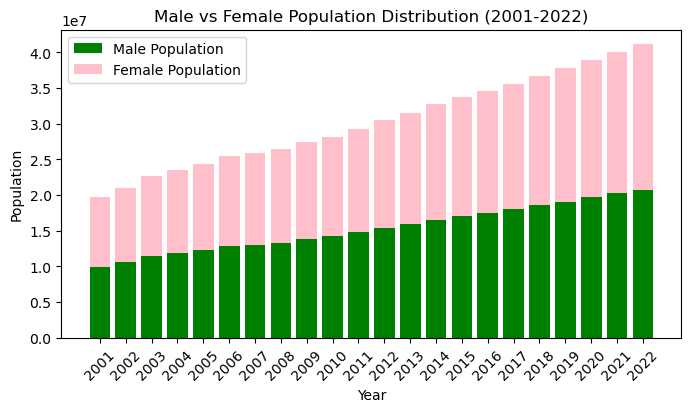

In [59]:
years = np.array([str(year) for year in range(2001, 2023)])

plt.figure(figsize=(8, 4))

plt.bar(years, male_values, label="Male Population", color="green")
plt.bar(years, female_values, bottom=male_values, label="Female Population", color="pink")

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Male vs Female Population Distribution (2001-2022)")
plt.legend()
plt.xticks(rotation=45)
plt.show()


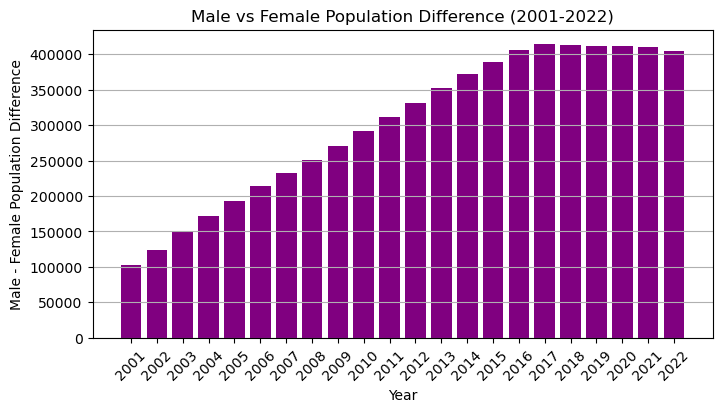

In [60]:
difference = male_values - female_values

plt.figure(figsize=(8, 4))
plt.bar(years, difference, color='purple')

plt.xlabel("Year")
plt.ylabel("Male - Female Population Difference")
plt.title("Male vs Female Population Difference (2001-2022)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Grouped Bar Chart for the Top 10 Most Populous Countries (2022)

In [61]:
df_total  = population_data[population_data['Series Name'] == 'Population, total'].copy()
df_female = population_data[population_data['Series Name'] == 'Population, female'].copy()
df_male   = population_data[population_data['Series Name'] == 'Population, male'].copy()

year = '2022'
df_total  = df_total[['Country Name', year]].rename(columns={year: 'Total'})
df_female = df_female[['Country Name', year]].rename(columns={year: 'Female'})
df_male   = df_male[['Country Name', year]].rename(columns={year: 'Male'})

merged_df = df_total.merge(df_female, on='Country Name').merge(df_male, on='Country Name')
for col in ['Total', 'Female', 'Male']:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')
merged_df.dropna(inplace=True)

merged_df.sort_values('Total', ascending=False, inplace=True)
top_10 = merged_df.head(10)


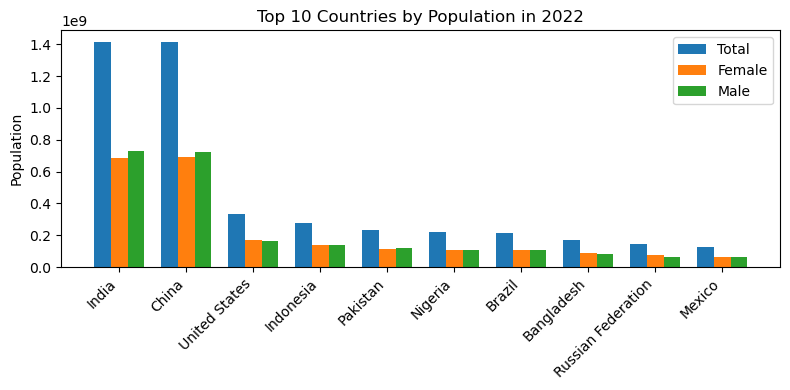

In [63]:
x = np.arange(len(top_10))
width = 0.25

fig, ax = plt.subplots(figsize=(8, 4))

bars_total  = ax.bar(x - width, top_10['Total'],  width, label='Total')
bars_female = ax.bar(x,         top_10['Female'], width, label='Female')
bars_male   = ax.bar(x + width, top_10['Male'],   width, label='Male')

ax.set_xticks(x)
ax.set_xticklabels(top_10['Country Name'], rotation=45, ha='right')
ax.set_ylabel('Population')
ax.set_title(f'Top 10 Countries by Population in {year}')
ax.legend()

plt.tight_layout()
plt.show()